In [1]:
import pandas as pd
df = pd.read_csv("/content/pharma_sales_data.csv")
df.head()


,date,region,product,sales,sales_rep_spend,digital_spend,doctor_visits,price
0,2021-01-31,North,Drug_A,14500,320,210,95,10.5
1,2021-02-28,North,Drug_A,13800,300,190,90,10.6
2,2021-03-31,North,Drug_A,15200,340,230,100,10.4
3,2021-04-30,North,Drug_A,16000,360,250,110,10.3
4,2021-05-31,North,Drug_A,17000,380,270,115,10.2


,date,region,product,sales,sales_rep_spend,digital_spend,doctor_visits,price
0,2021-01-31,North,Drug_A,14500,320,210,95,10.5
1,2021-02-28,North,Drug_A,13800,300,190,90,10.6
2,2021-03-31,North,Drug_A,15200,340,230,100,10.4
3,2021-04-30,North,Drug_A,16000,360,250,110,10.3
4,2021-05-31,North,Drug_A,17000,380,270,115,10.2


In [6]:
import pandas as pd

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             24 non-null     object 
 1   region           24 non-null     object 
 2   product          24 non-null     object 
 3   sales            24 non-null     int64  
 4   sales_rep_spend  24 non-null     int64  
 5   digital_spend    24 non-null     int64  
 6   doctor_visits    24 non-null     int64  
 7   price            24 non-null     float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.6+ KB


In [7]:
# Create a 'Month' column (Year-Month)
df['Month'] = df['date'].dt.to_period('M')

# Aggregate sales by Month and Product
monthly_sales = df.groupby(['Month', 'product'])['sales'].sum().reset_index()

monthly_sales.head()


,Month,product,sales
0,2021-01,Drug_A,53500
1,2021-02,Drug_A,51100
2,2021-03,Drug_A,56200
3,2021-04,Drug_A,59500
4,2021-05,Drug_A,63500


In [8]:
# Aggregate sales by Month and Product
monthly_sales = df.groupby(['Month', 'product'])['sales'].sum().reset_index()

monthly_sales.head()


,Month,product,sales
0,2021-01,Drug_A,53500
1,2021-02,Drug_A,51100
2,2021-03,Drug_A,56200
3,2021-04,Drug_A,59500
4,2021-05,Drug_A,63500


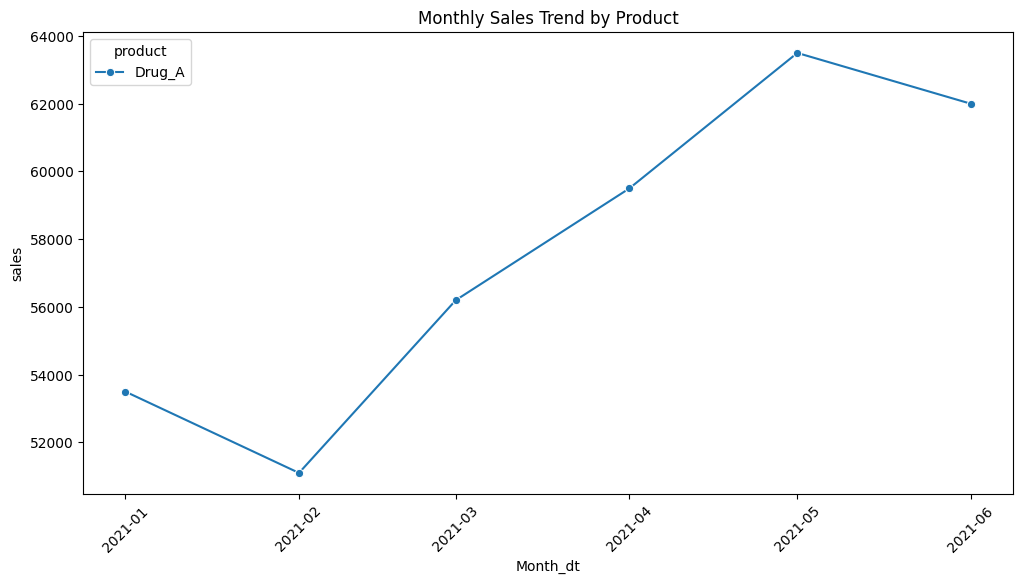

In [11]:
monthly_sales['Month_dt'] = monthly_sales['Month'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month_dt', y='sales', hue='product', marker='o')
plt.title("Monthly Sales Trend by Product")
plt.xticks(rotation=45)
plt.show()


In [12]:
from prophet import Prophet

# Example: Forecast for product 'Drug A'
product_name = 'Drug A'
product_sales = monthly_sales[monthly_sales['product'] == product_name][['Month_dt', 'sales']]

# Rename columns for Prophet
product_sales = product_sales.rename(columns={'Month_dt': 'ds', 'sales': 'y'})


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.


          ds      y
0 2021-01-01  53500
1 2021-02-01  51100
2 2021-03-01  56200
3 2021-04-01  59500
4 2021-05-01  63500
5 2021-06-01  62000


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


           ds          yhat    yhat_lower    yhat_upper
7  2021-07-31  1.875540e+06  1.875540e+06  1.875540e+06
8  2021-08-31 -1.013653e+06 -1.013653e+06 -1.013653e+06
9  2021-09-30  1.071870e+06  1.071870e+06  1.071870e+06
10 2021-10-31  8.088341e+05  8.088341e+05  8.088341e+05
11 2021-11-30 -6.429138e+05 -6.429138e+05 -6.429138e+05


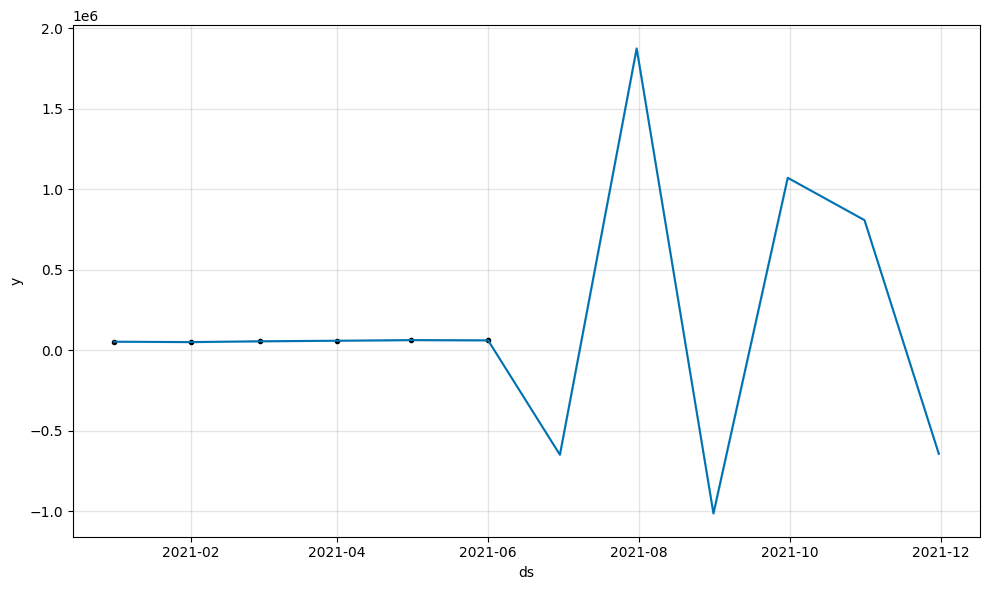

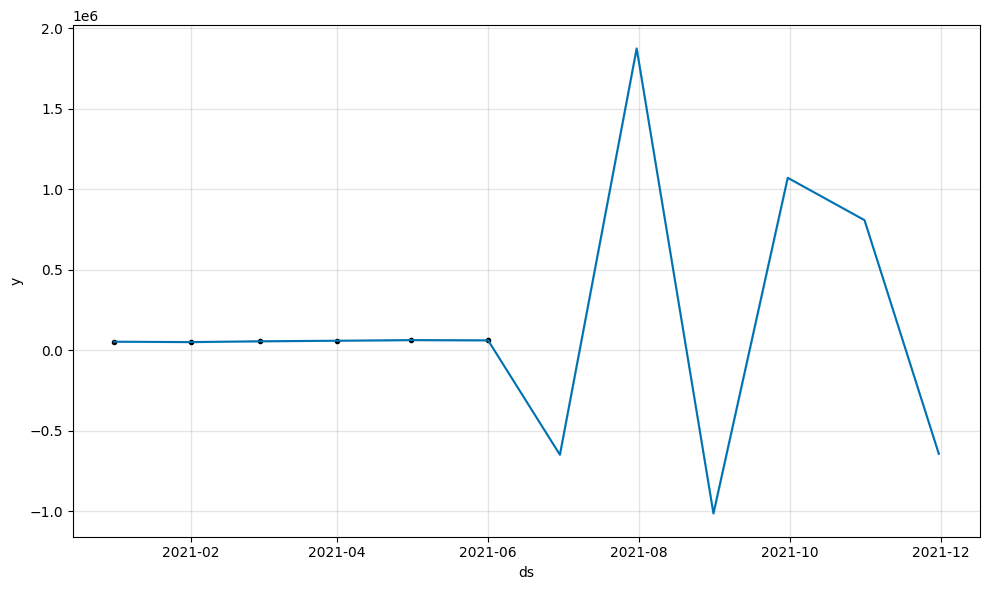

In [17]:
from prophet import Prophet
import pandas as pd

# Prepare data for Prophet
product_sales = monthly_sales[monthly_sales['product'] == 'Drug_A'][['Month_dt', 'sales']]
product_sales = product_sales.rename(columns={'Month_dt': 'ds', 'sales': 'y'})

# Check the data
print(product_sales)

# Initialize Prophet model
model = Prophet(yearly_seasonality=True)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model
model.fit(product_sales)

# Create future dataframe for next 6 months
future = model.make_future_dataframe(periods=6, freq='M')

# Forecast
forecast = model.predict(future)

# Show forecasted sales
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot forecast
model.plot(forecast)


In [19]:
# Step 1: Create Month_dt in the main df
df['Month_dt'] = df['date'].dt.to_period('M').dt.to_timestamp()  # first day of the month

# Step 2: Aggregate monthly totals/averages for marketing analysis
monthly_marketing = df.groupby(['Month_dt', 'product']).agg({
    'sales': 'sum',
    'sales_rep_spend': 'sum',
    'digital_spend': 'sum',
    'doctor_visits': 'sum',
    'price': 'mean'  # average price
}).reset_index()

# Check the table
monthly_marketing.head()


,Month_dt,product,sales,sales_rep_spend,digital_spend,doctor_visits,price
0,2021-01-01,Drug_A,53500,1200,790,360,10.625
1,2021-02-01,Drug_A,51100,1130,730,340,10.725
2,2021-03-01,Drug_A,56200,1270,870,387,10.525
3,2021-04-01,Drug_A,59500,1350,950,420,10.425
4,2021-05-01,Drug_A,63500,1430,1030,440,10.325


In [20]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Select features (marketing variables) and target (sales)
X = monthly_marketing[['sales_rep_spend', 'digital_spend', 'doctor_visits', 'price']]
y = monthly_marketing['sales']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Check coefficients to see impact of each variable
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("Impact of marketing variables on sales:")
print(coeff_df)

# Optional: check model accuracy
r2 = model.score(X, y)
print(f"\nR-squared of the model: {r2:.2f}")


Impact of marketing variables on sales:
           Feature  Coefficient
0  sales_rep_spend    44.535930
1    digital_spend    17.955134
2    doctor_visits   -38.382842
3            price  6379.514360

R-squared of the model: 1.00


In [21]:
import numpy as np

# Suppose total marketing budget
total_budget = 100000  # adjust as needed

# Get coefficients for the three controllable variables
coeff_df = coeff_df.set_index('Feature')
coefficients = coeff_df.loc[['sales_rep_spend', 'digital_spend', 'doctor_visits'], 'Coefficient']

# Make negative coefficients zero (we don't spend on variables that reduce sales)
coefficients[coefficients < 0] = 0

# Calculate proportion of budget for each channel
budget_allocation = (coefficients / coefficients.sum()) * total_budget

print("Recommended budget allocation:")
print(budget_allocation)


Recommended budget allocation:
Feature
sales_rep_spend    71267.677863
digital_spend      28732.322137
doctor_visits          0.000000
Name: Coefficient, dtype: float64
